## P- Median Location Problem - Random Sampling

### Import Packages

In [1]:
from pyomo.environ import *
import pyomo.environ as pyo
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [2]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=100

#Number of locations to open
openfac=15

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

#Generate demand between locations
demandlct = random.choices(range(1, 50), k=n)


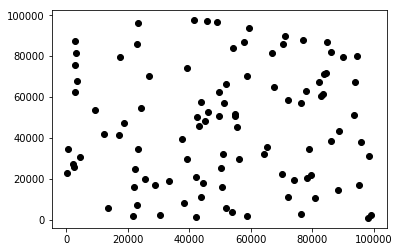

In [3]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [4]:
#Generate Location Variable 
yi=np.zeros([n, 1])

#Generate Initial Random Solution
yi_open = random.sample(range(0, n), openfac)
yi_open=np.sort(yi_open)
yi[yi_open]=1

In [5]:
#Allocate locations to the closest open location
distancelct_open=distancelct[np.where(yi)[0]]
assignment_open=np.argmin(distancelct_open, axis=0)
objvalue_open=distancelct_open.min(axis=0)*demandlct
objvalue=sum(objvalue_open)

In [6]:
#Update link list
linkindex_p1=range(n)
linkindex_p2=assignment_open
yi_open_index = np.array(yi_open)
linkindex_p2 = yi_open_index[linkindex_p2]

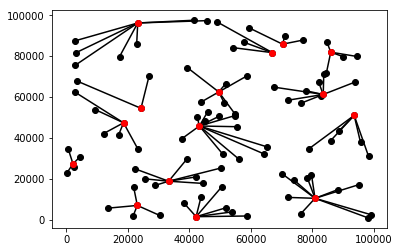

In [7]:
#Plot initial solution
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(n): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

plt.plot(coordlct_x, coordlct_y, 'o', color='black');

for i_index in range(len(yi_open)): 
    plt.plot(coordlct_x[yi_open[i_index]], coordlct_y[yi_open[i_index]], 'o', color='red');

In [8]:
objvalue

26295266.372859858

### Random Algorithm

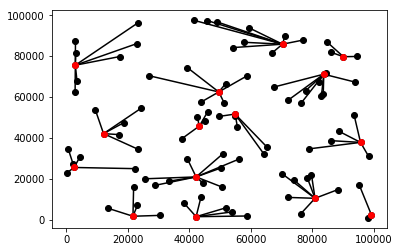

<Figure size 432x288 with 0 Axes>

In [9]:
random.seed(3)
iteration=0
objvalue_i=objvalue
program_starts = time.time()
cputime_i=0  

while iteration<100000:
    yi=np.zeros([n, 1])
    
    # Start random Procedure
    yi_open = random.sample(range(0, n), openfac)
    yi_open=np.sort(yi_open)
    yi[yi_open]=1

    #Allocate locations to the closest open location
    distancelct_open=distancelct[np.where(yi)[0]]
    assignment_open=np.argmin(distancelct_open, axis=0)
    objvalue_open=distancelct_open.min(axis=0)*demandlct
    objvalue=sum(objvalue_open)
    
    iteration=iteration+1
    
    #If objective values improves
    if objvalue<np.min(objvalue_i):
        
        #Compute links
        linkindex_p1=range(n)
        linkindex_p2=assignment_open
        yi_open_index = np.array(yi_open)
        linkindex_p2 = yi_open_index[linkindex_p2]
        
         #Plot results
        def connectpoints(x,y,p1,p2):
            x1, x2 = x[p1], x[p2]
            y1, y2 = y[p1], y[p2]
            plt.plot([x1,x2],[y1,y2],'k-')

        for i_index in range(n): 
            connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

        plt.plot(coordlct_x, coordlct_y, 'o', color='black');
        
        for i_index in range(len(yi_open)): 
            plt.plot(coordlct_x[yi_open[i_index]], coordlct_y[yi_open[i_index]], 'o', color='red');
         
        #Update vector of objective values and CPU Time
        objvalue_i=np.append(objvalue_i, objvalue)
        
        now = time.time()
        cputime_i=np.append(cputime_i, now-program_starts)
        
        clear_output(wait=True)
        plt.draw()
        plt.pause(0.0001)
        plt.clf()
        
         
#Update last objective value
objvalue_i=np.append(objvalue_i, min(objvalue_i))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

### Plot results

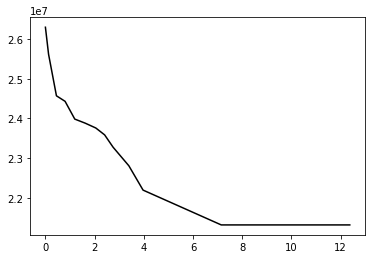

In [10]:
plt.plot(cputime_i,objvalue_i,'k-')

In [11]:
np.min(objvalue_i)

21321318.07420405